In [1]:
#Load dataset + create journey
import pandas as pd

# Load dataset
df = pd.read_csv("Dataset.csv", engine="python", on_bad_lines="skip")

# Cleaning
df["Arrival_time"] = pd.to_datetime(df["Arrival_time"], errors="coerce")
df["Departure_Time"] = pd.to_datetime(df["Departure_Time"], errors="coerce")

# Feature creation
journey = df.groupby("Train_No").agg(
    start=("Departure_Time","first"),
    end=("Arrival_time","last"),
    total_distance=("Distance","max"),
    stops=("Station_Name","count")
)

journey["duration"] = (journey["end"]-journey["start"]).dt.total_seconds()/3600
journey = journey.dropna()

print("Journey ready ✅", journey.shape)

Journey ready ✅ (686, 5)


C:\Users\Ashu21\AppData\Local\Temp\ipykernel_5808\3159973862.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Arrival_time"] = pd.to_datetime(df["Arrival_time"], errors="coerce")
C:\Users\Ashu21\AppData\Local\Temp\ipykernel_5808\3159973862.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Departure_Time"] = pd.to_datetime(df["Departure_Time"], errors="coerce")


In [2]:
#Train Test Split
from sklearn.model_selection import train_test_split

X = journey[["total_distance","stops"]]
y = journey["duration"]

X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.2,random_state=42
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (548, 2)
Test size: (138, 2)


In [3]:
#Train Model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

print("Model trained ✅")

Model trained ✅


In [4]:
#Prediction + Metrics
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test,pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test,pred)))

MAE: 6.772822160579352
RMSE: 8.517677314877417


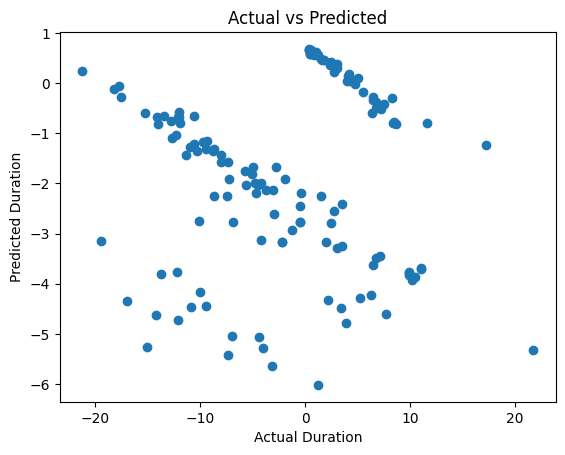

In [5]:
#Actual vs Predicted Plot
import matplotlib.pyplot as plt

plt.scatter(y_test,pred)
plt.xlabel("Actual Duration")
plt.ylabel("Predicted Duration")
plt.title("Actual vs Predicted")
plt.show()

In [6]:
#Save model (VERY IMPORTANT)
import joblib

joblib.dump(model,"train_duration_model.pkl")
print("Model saved ✅")

Model saved ✅
